# Import Libraries

In [45]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina

sns.set()

# Import Datasets

Import the datasets from csv files using commas as separators of the columns and setting the unique customer identifier as the index of both columns.

In [46]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty# as the index

In [47]:
customerDB = customerDB.iloc[:, 1:]

# Metadata

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program


**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

# Conduct Descriptive Statistics and Visualisations (CustomerDB)

In [ ]:
metric_features = customerDB.select_dtypes(include=['number']).columns.tolist()
non_metric_features = customerDB.columns.drop(metric_features).to_list()

metric_features

#acho que não faz sentido ter a variavel loyalty como métrica pq esta é só um valor de ID dos clientes

['Latitude', 'Longitude', 'Income', 'Customer Lifetime Value']

Create histograms for a general analysis of the features

In [ ]:
sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(customerDB[feat])
    ax.set_title(feat, y=-0.17)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()



NameError: name 'plt' is not defined

# Conduct Descriptive Statistics and Visualisations (FlightsDB)

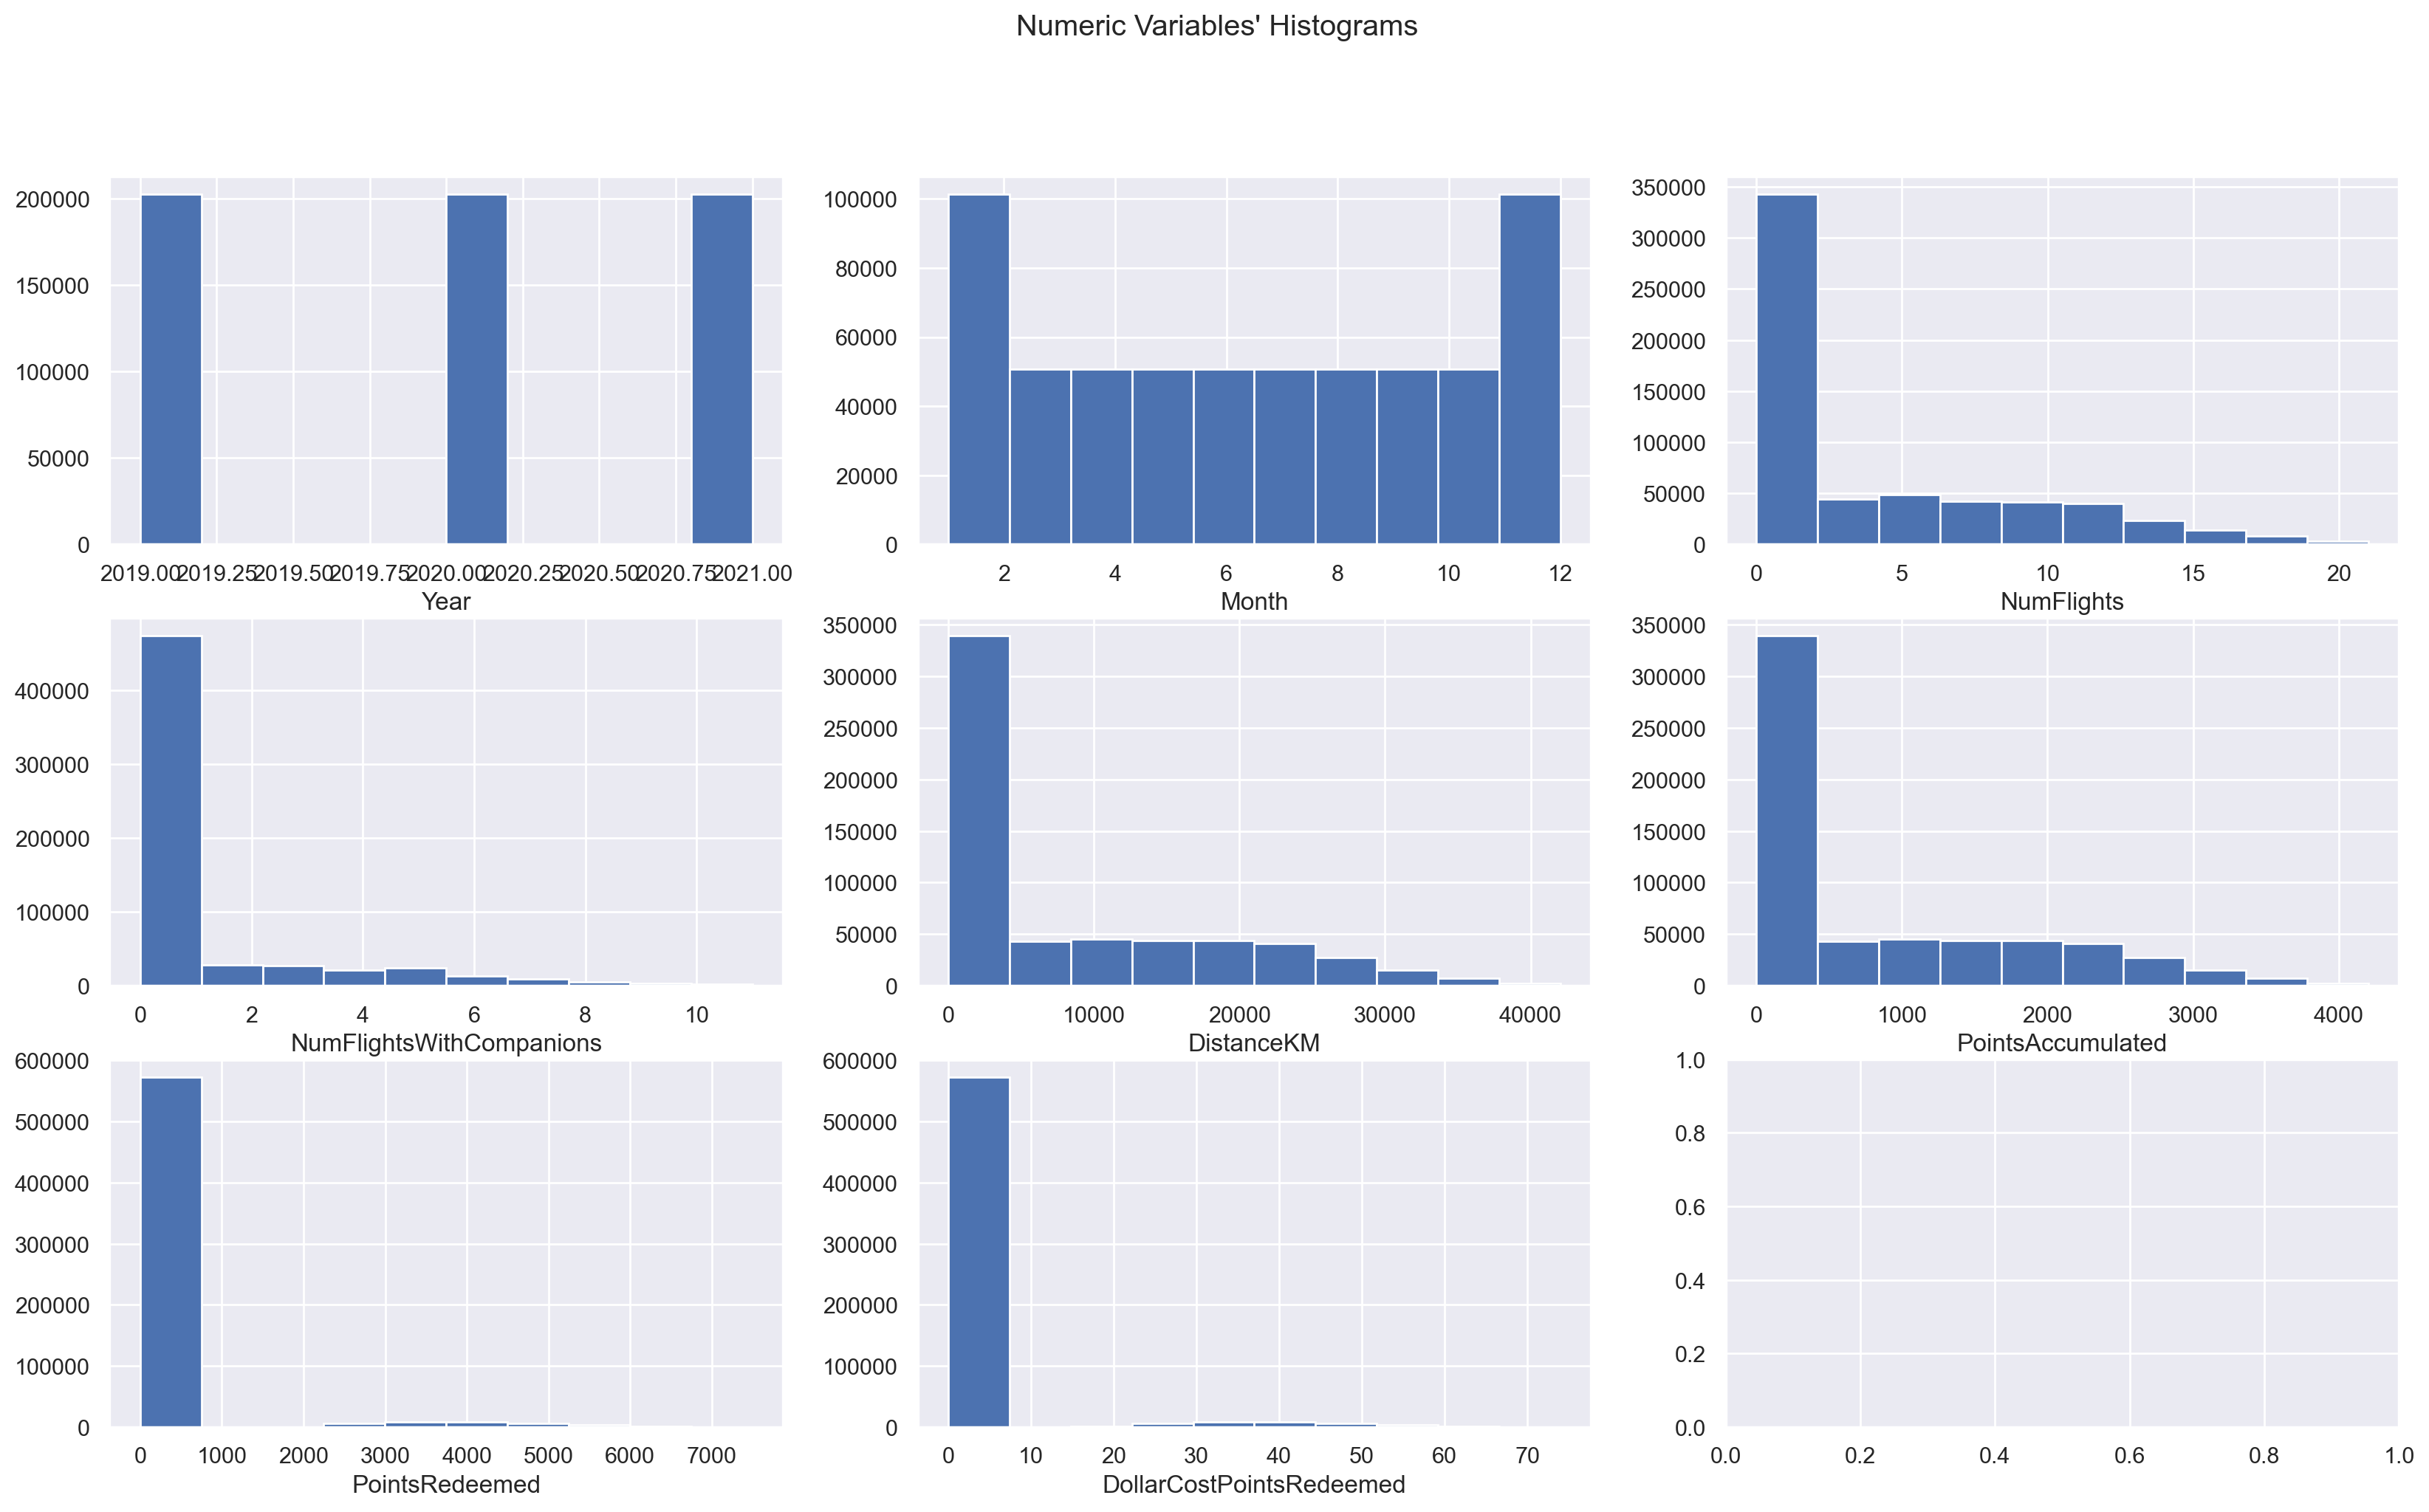

In [51]:
non_metric_features = ["YearMonthDate"]
metric_features = flightsDB.columns.drop(non_metric_features).to_list()

sp_rows = 3
sp_cols = 3

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(flightsDB[feat])
    ax.set_title(feat, y=-0.21)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()



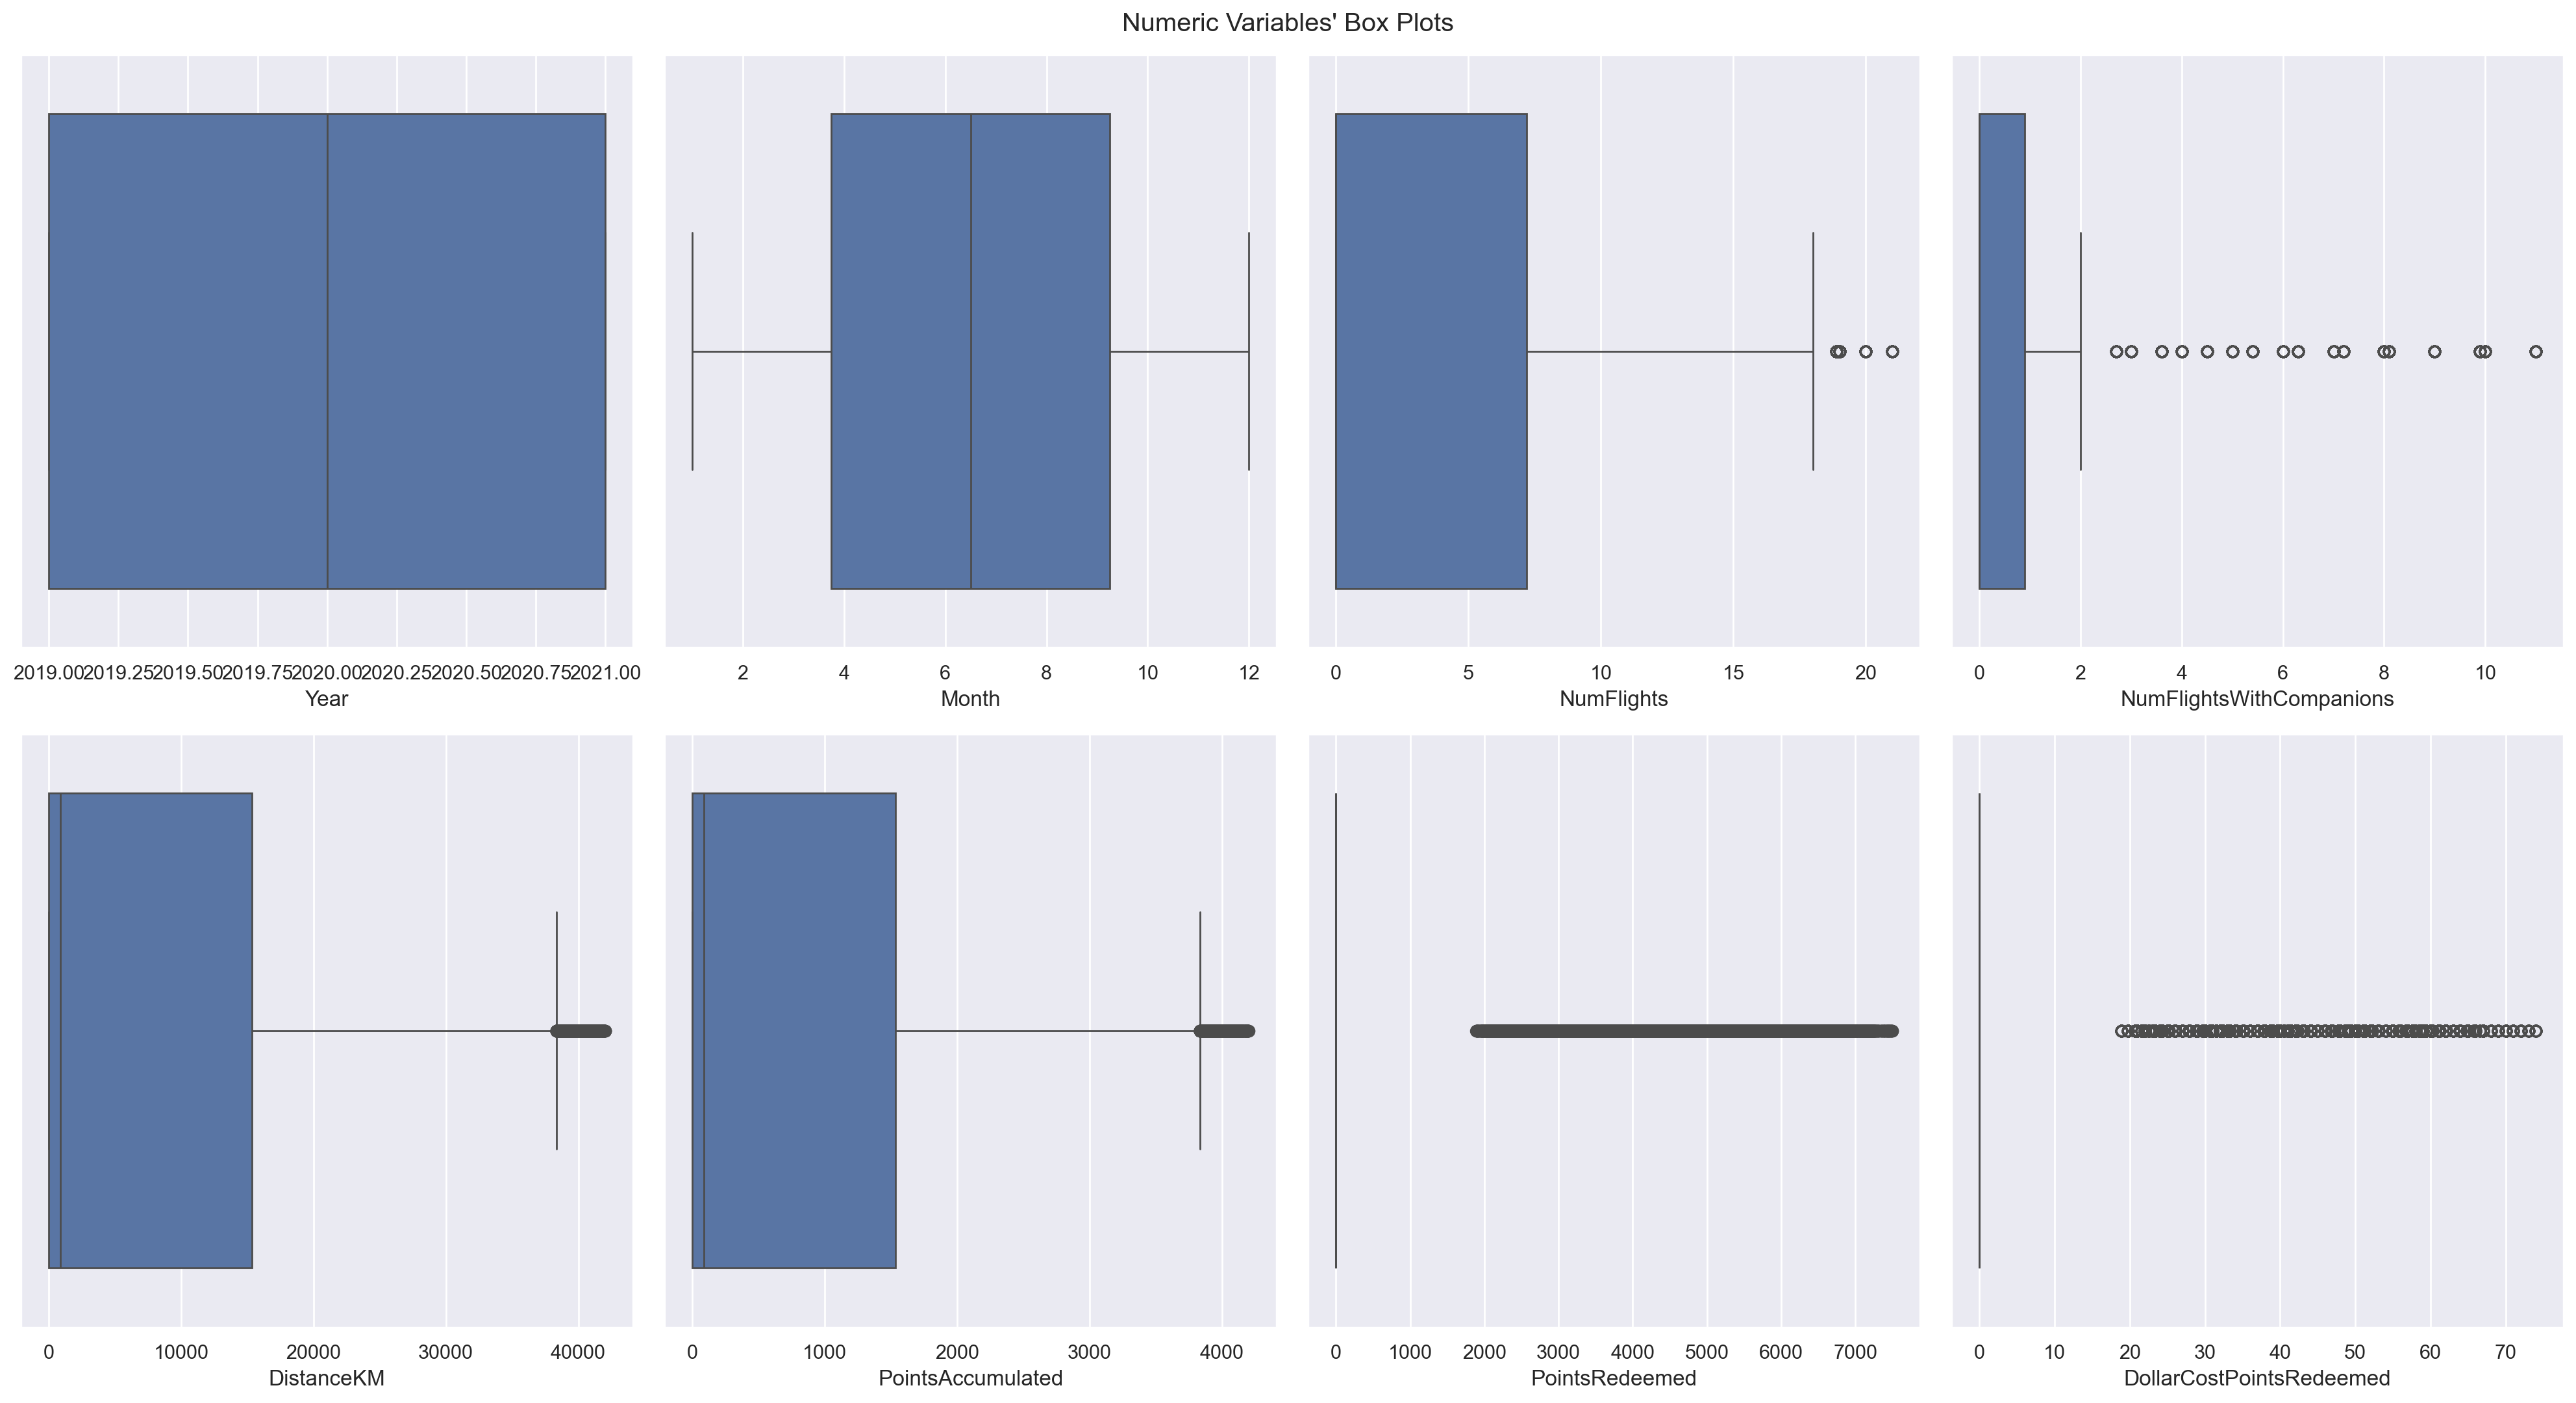

In [52]:
## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=flightsDB[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

# General Look at the Flight DataSet

In [53]:
flightDB.shape

NameError: name 'flightDB' is not defined

In [ ]:
flightDB.head(10)


   Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   
5    486956  2021     12     12/1/2021        12.0                       7.0   
6    247514  2021     12     12/1/2021        17.0                       7.0   
7    711864  2021     12     12/1/2021         6.0                       0.0   
8    721372  2021     12     12/1/2021        11.0                       3.0   
9    762715  2021     12     12/1/2021         0.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0          

In [ ]:
flightDB.tail(10)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608426,999631,2019,12,12/1/2019,3.6,1.8,12262.5,1226.25,0.0,0.0
608427,999731,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608428,999758,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608429,999788,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608430,999891,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


O NumFlights e NumFlightsWithCompanions têm decimais enquanto deviam ser integers
Os PointsAccumulated e PointsRedeemed devem ter decimais??

In [ ]:
flightDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


Como todas as variáveis têm 608436 rows não nulas, está ok

In [ ]:
flightDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

Esta info pode estar errada consoante o tipo de variáveis

In [ ]:
flightDB.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000
mean,550037.873084,2020.000000,6.500000,3.908107,0.983944,7939.341419,793.777781,235.251678,2.324835
std,258935.180575,0.816497,3.452055,5.057889,2.003785,10260.421873,1025.918521,983.233374,9.725168
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2019.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2020.000000,6.500000,0.000000,0.000000,856.400000,85.275000,0.000000,0.000000
75%,772194.000000,2021.000000,9.250000,7.200000,0.900000,15338.175000,1533.712500,0.000000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


In [ ]:
flightDB.describe(include='object')

,YearMonthDate
count,608436
unique,36
top,12/1/2021
freq,16901


o "top" é a moda e "freq" é a frequencia do valor mais frequente

"unique" é a quantidade de valores unicos ((36 datas diferentes pq é o primeiro dia de cada mês durante 3 anos))

"count" é o numero de valores nao nulos

In [ ]:
flightDB.replace("", np.nan, inplace=True)
flightDB.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

retirar?

In [ ]:
flightDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0


In [ ]:
flightDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

In [ ]:
# Converter as colunas para integers
# flightDB.NumFlights = flightDB.NumFlights.astype("int")
# flightDB.NumFlightsWithCompanions = flightDB.NumFlightsWithCompanions.astype("int")
# flightDB.PointsRedeemed = flightDB.PointsRedeemed.astype("int")
# flightDB.DollarCostPointsRedeemed = flightDB.DollarCostPointsRedeemed.astype("int")


# ver se é a melhor approach

In [ ]:
# flightDB.dtypes

## Relação KM e Pontos

In [ ]:
flightDB[["DistanceKM", "PointsAccumulated"]]

,DistanceKM,PointsAccumulated
0,9384.0,938.00
1,0.0,0.00
2,14745.0,1474.00
3,26311.0,2631.00
4,19275.0,1927.00
...,...,...
608431,30766.5,3076.65
608432,0.0,0.00
608433,18261.0,1826.10
608434,0.0,0.00


A cada 10km, é 1 ponto mas

nos primeiros 5, arredonda para baixo, sendo todos números inteiros

nos últimos 5, mantém as decimais

In [ ]:
flightDB[["PointsRedeemed", "DollarCostPointsRedeemed"]][flightDB.PointsRedeemed > 0]

,PointsRedeemed,DollarCostPointsRedeemed
3,3213,32.0
29,4638,46.0
50,4050,40.0
56,5151,51.0
58,6244,62.0
...,...,...
608328,2759,27.0
608343,4783,47.7
608374,4127,40.5
608414,2709,27.0


100 points = 1 dollar

arredondando para baixo, sem cêntimos nos dados mais recentes (de cima)

com casas decimais, com cêntimos nos dados mais recentes (de cima)

In [ ]:
numeric_variables= flightDB.loc[:,['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']]
numeric_variables.sum()

NumFlights                  2.328622e+06
NumFlightsWithCompanions    5.986672e+05
PointsAccumulated           4.829630e+08
PointsRedeemed              1.431306e+08
DollarCostPointsRedeemed    1.414513e+06
dtype: float64

# Check Duplicate Values

In [ ]:
flightDB.duplicated().sum()

np.int64(2903)

In [ ]:
flightDB[flightDB.duplicated()]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
3150,263267,2020,6,6/1/2020,0,0.0,0.0,0.0,0,0.0
3442,584833,2020,6,6/1/2020,0,0.0,0.0,0.0,0,0.0
5193,351615,2020,5,5/1/2020,0,0.0,0.0,0.0,0,0.0
5371,979115,2020,5,5/1/2020,0,0.0,0.0,0.0,0,0.0
5397,951353,2020,5,5/1/2020,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
607515,950980,2019,12,12/1/2019,0,0.0,0.0,0.0,0,0.0
607519,951353,2019,12,12/1/2019,0,0.0,0.0,0.0,0,0.0
607696,960050,2019,12,12/1/2019,0,0.0,0.0,0.0,0,0.0
608111,981508,2019,12,12/1/2019,0,0.0,0.0,0.0,0,0.0


In [ ]:
flightDB[flightDB["Loyalty#"] == 263267]


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
1092,263267,2020,6,6/1/2020,0,0.0,0.0,0.0,0,0.0
3150,263267,2020,6,6/1/2020,0,0.0,0.0,0.0,0,0.0
14057,263267,2020,5,5/1/2020,0,0.0,0.0,0.0,0,0.0
25441,263267,2020,5,5/1/2020,0,0.0,0.0,0.0,0,0.0
37425,263267,2020,4,4/1/2020,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
560775,263267,2019,10,10/1/2019,0,0.0,0.0,0.0,0,0.0
577675,263267,2019,11,11/1/2019,0,0.0,0.0,0.0,0,0.0
577676,263267,2019,11,11/1/2019,0,0.0,0.0,0.0,0,0.0
594576,263267,2019,12,12/1/2019,0,0.0,0.0,0.0,0,0.0


72 rows iguais, ou seja, todos os 36 unique values estão duplicados.

In [ ]:
flightDB.drop_duplicates()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2,2.0,9384.0,938.00,0,0.0
1,464105,2021,12,12/1/2021,0,0.0,0.0,0.00,0,0.0
2,681785,2021,12,12/1/2021,10,3.0,14745.0,1474.00,0,0.0
3,185013,2021,12,12/1/2021,16,4.0,26311.0,2631.00,3213,32.0
4,216596,2021,12,12/1/2021,9,0.0,19275.0,1927.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,12/1/2019,7,0.0,30766.5,3076.65,0,0.0
608432,999911,2019,12,12/1/2019,0,0.0,0.0,0.00,0,0.0
608433,999940,2019,12,12/1/2019,14,0.9,18261.0,1826.10,0,0.0
608434,999982,2019,12,12/1/2019,0,0.0,0.0,0.00,0,0.0


In [ ]:
flightDB.duplicated().sum()

np.int64(2903)

In [ ]:
flightDB2 = flightDB.drop_duplicates()
flightDB2.duplicated().sum()

np.int64(0)

# General Look at the Costumer DataSet

In [ ]:
customerDB.shape

(16921, 21)

In [ ]:
customerDB.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
Loyalty#,480934,549612,429460,608370,530508,193662,927943,188893,852392,866307
First Name,Cecilia,Dayle,Necole,Queen,Claire,Leatrice,Hue,Nakia,Arlene,Dustin
Last Name,Householder,Menez,Hannon,Hagee,Latting,Hanlin,Sellner,Cash,Conterras,Recine
Customer Name,Cecilia Householder,Dayle Menez,Necole Hannon,Queen Hagee,Claire Latting,Leatrice Hanlin,Hue Sellner,Nakia Cash,Arlene Conterras,Dustin Recine
Country,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
Province or State,Ontario,Alberta,British Columbia,Ontario,Quebec,Yukon,Ontario,Ontario,Quebec,Ontario
City,Toronto,Edmonton,Vancouver,Toronto,Hull,Whitehorse,Toronto,Trenton,Montreal,Toronto
Latitude,43.653225,53.544388,49.28273,43.653225,45.42873,60.721188,43.653225,44.101128,45.50169,43.653225
Longitude,-79.383186,-113.49093,-123.12074,-79.383186,-75.713364,-135.05684,-79.383186,-77.576309,-73.567253,-79.383186


In [ ]:
customerDB.tail().T 
#pusemos em trasnposto para ver melhor a informação de todas as features

,16916,16917,16918,16919,16920
Unnamed: 0,15,16,17,18,19
Loyalty#,100012,100013,100014,100015,100016
First Name,Ethan,Layla,Amelia,Benjamin,Emma
Last Name,Thompson,Young,Bennett,Wilson,Martin
Customer Name,Ethan Thompson,Layla Young,Amelia Bennett,Benjamin Wilson,Emma Martin
Country,Canada,Canada,Canada,Canada,Canada
Province or State,Quebec,Alberta,New Brunswick,Quebec,British Columbia
City,Quebec City,Edmonton,Moncton,Quebec City,Dawson Creek
Latitude,46.759733,53.524829,46.051866,46.86297,55.720562
Longitude,-71.141009,-113.546357,-64.825428,-71.133444,-120.16009


In [ ]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

Conclusões da análise anterior: temos valores nulos nas variáveis "Income", "CancellationDate" e "CustomerLifetimeValue"

Podemos dizer faz sentido ter NaN values na "CancellationDate", pois isso significa que há clientes que não abandonaram o programa

Em relação à variável "Income" poderá fazer sentido ter NaN values nos casos em que os clientes não queiram partilhar o seu rendimento pessoal anual. Ou podem tb ser erros de input. (Depende da interpretação)

Para a variável "CustomerLifetimeValue" achamos que não faz sentido existirem NaN values pq mesmo que o cliente não tenha nenhum valor para a empresa o seu CustomerLifetimeValue será 0.

In [ ]:
customerDB.dtypes

Unnamed: 0                   int64
Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

Estes tipos podem estar mal consoante o que considerarmos nas datas (objeto ou inteiro)

In [ ]:
customerDB.describe()

,Unnamed: 0,Loyalty#,Latitude,Longitude,Income,Customer Lifetime Value
count,16921.000000,16921.000000,16921.000000,16921.000000,16901.000000,16901.000000
mean,8440.023639,550197.393771,47.174500,-91.814768,37758.038400,7990.460188
std,4884.775439,259251.503597,3.307971,22.242429,30368.992499,6863.173093
min,0.000000,100011.000000,42.984924,-135.056840,0.000000,1898.010000
25%,4210.000000,326823.000000,44.231171,-120.237660,0.000000,3979.720000
50%,8440.000000,550896.000000,46.087818,-79.383186,34161.000000,5780.180000
75%,12670.000000,772438.000000,49.282730,-74.596184,62396.000000,8945.690000
max,16900.000000,999999.000000,60.721188,-52.712578,99981.000000,83325.380000


In [ ]:
customerDB.describe(include='object').T

,count,unique,top,freq
First Name,16921,4941,Deon,13
Last Name,16921,15404,Salberg,4
Customer Name,16921,16921,Cecilia Householder,1
Country,16921,1,Canada,16921
Province or State,16921,11,Ontario,5468
City,16921,29,Toronto,3390
Postal code,16921,75,V6E 3D9,917
Gender,16921,2,female,8497
Education,16921,5,Bachelor,10586
Location Code,16921,3,Suburban,5716


In [ ]:
customerDB.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,NaN,NaN,NaN,8440.023639,4884.775439,0.0,4210.0,8440.0,12670.0,16900.0
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Deon,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Cecilia Householder,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578


In [ ]:
customerDB.replace("", np.nan, inplace=True)
customerDB.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

# Variable Comparison

In [ ]:
customerDB[["Income", "Customer Lifetime Value"]]

,Income,Customer Lifetime Value
0,70146.0,3839.14
1,0.0,3839.61
2,0.0,3839.75
3,0.0,3839.75
4,97832.0,3842.79
...,...,...
16916,NaN,NaN
16917,NaN,NaN
16918,NaN,NaN
16919,NaN,NaN


Daqui podemos talvez concluir que 20 NaN values no Income poderão ser os mesmo 20 do Costumer LifeTime Value

In [ ]:
customerDB[["EnrollmentDateOpening", "CancellationDate"]]

,EnrollmentDateOpening,CancellationDate
0,2/15/2019,NaN
1,3/9/2019,NaN
2,7/14/2017,1/8/2021
3,2/17/2016,NaN
4,10/25/2017,NaN
...,...,...
16916,2/27/2019,2/27/2019
16917,9/20/2017,9/20/2017
16918,11/28/2020,11/28/2020
16919,4/9/2020,4/9/2020


Mais uma vez os ultimos valores parecem nao fazer sentido, pq o dia de adesão é o mesmo que o dia do cancelamento. Provavelmente teremos de eliminar estas observações pq devem ser erros

!!!! Faz sentido comparar muitas variáveis duas a duas então talvez seja mais fácil realizar os histogramas de cada par de variáveis para comparar mais rapidamente todos os pares e tirar conclusões

# Check Duplicates

In [ ]:
customerDB_no_name = customerDB.drop(columns=["First Name", "Last Name", "Customer Name"])
customerDB_no_name.duplicated().sum()
#raciocínio: criar uma variável sem os nomes pq já vimos que não há nomes repetidos
#mas a stora avisou que isto podia acontecer mas que as restantes features podiam ser iguais
#e estes nomes diferentes podiam ser um erro de input

np.int64(0)